In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import NaN, NAN, nan
import requests
import json
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import re
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import bar_chart_race as bcr
from PIL import Image

In [2]:
df = pd.read_csv('data/done/final_season.csv', encoding='cp949')

In [3]:
df.columns

Index(['년', '지역', '면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)', 'sp평균상대습도(%)',
       'sp최소상대습도(%)', 'su평균상대습도(%)', 'su최소상대습도(%)', 'fa평균상대습도(%)',
       'fa최소상대습도(%)', 'sp평균현지기압(hPa)', 'sp평균해면기압(hPa)', 'sp최고해면기압(hPa)',
       'sp최저해면기압(hPa)', 'su평균현지기압(hPa)', 'su평균해면기압(hPa)', 'su최고해면기압(hPa)',
       'su최저해면기압(hPa)', 'fa평균현지기압(hPa)', 'fa평균해면기압(hPa)', 'fa최고해면기압(hPa)',
       'fa최저해면기압(hPa)', 'sp합계일조시간(hr)', 'sp합계전천일사량(MJ/㎡)', 'su합계일조시간(hr)',
       'su합계전천일사량(MJ/㎡)', 'fa합계일조시간(hr)', 'fa합계전천일사량(MJ/㎡)', 'sp평균기온(℃)',
       'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
       'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
       'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)', 'sp평균풍속(m/s)',
       'sp최대풍속(m/s)', 'su평균풍속(m/s)', 'su최대풍속(m/s)', 'fa평균풍속(m/s)',
       'fa최대풍속(m/s)'],
      dtype='object')

In [4]:
df.head(2)

,년,지역,면적 (ha),10a당 생산량 (kg),생산량 (톤),sp평균상대습도(%),sp최소상대습도(%),su평균상대습도(%),su최소상대습도(%),fa평균상대습도(%),...,fa평균기온(℃),fa최고기온 평균(℃),fa최저기온 평균(℃),fa강수량(mm),sp평균풍속(m/s),sp최대풍속(m/s),su평균풍속(m/s),su최대풍속(m/s),fa평균풍속(m/s),fa최대풍속(m/s)
0,1980,강원도,1408,609,8574,70.5,29.5,78.7,35.7,89.5,...,18.6,23.8,14.8,1230.9,2.4,11.3,2.1,10.2,1.6,7.8
1,1980,경기도,3723,406,15116,71.5,20.0,79.7,31.3,81.5,...,20.2,25.8,15.7,436.0,1.6,8.6,1.1,6.2,0.8,4.7


# bar chart race

In [5]:
ton =df[['년','지역','생산량 (톤)']]

In [6]:
ton

,년,지역,생산량 (톤)
0,1980,강원도,8574
1,1980,경기도,15116
2,1980,경상남도,10718
3,1980,경상북도,256590
4,1980,광주광역시,0
...,...,...,...
633,2021,전라남도,1635
634,2021,전라북도,35142
635,2021,제주도,0
636,2021,충청남도,22757


In [7]:
ton = pd.pivot_table(ton,values='생산량 (톤)',index='년',columns='지역')

In [8]:
ton = ton.fillna(0)

In [9]:
ton.iloc[:] = ton.iloc[:].cumsum()

* 필수사항

1. pip install bar_chart_race

2. [ffmpeg](https://github.com/BtbN/FFmpeg-Builds/releases)
ffmpeg-master-latest-win64-gpl.zip -> bin 폴더 환경변수 path에 등록

In [10]:
bcr.bar_chart_race(df = ton,period_length=250,
                   n_bars = 8,
                   figsize=(6, 4),
                   sort='desc',
                   title='지역별 사과생산량')

## 재배면적

In [11]:
map = df[['년','지역','면적 (ha)']]
map

,년,지역,면적 (ha)
0,1980,강원도,1408
1,1980,경기도,3723
2,1980,경상남도,1786
3,1980,경상북도,22667
4,1980,광주광역시,0
...,...,...,...
633,2021,전라남도,208
634,2021,전라북도,2033
635,2021,제주도,0
636,2021,충청남도,1551


In [12]:
map = pd.pivot_table(map,values='면적 (ha)',index='년',columns='지역')

In [13]:
map = map.fillna(0)

In [14]:
bcr.bar_chart_race(df = map,
                   period_length=250,
                   n_bars = 8,
                   figsize=(6, 4),
                   sort='desc',
                   title='연도별 재배면적 변화')

# 재배지 비율 파이

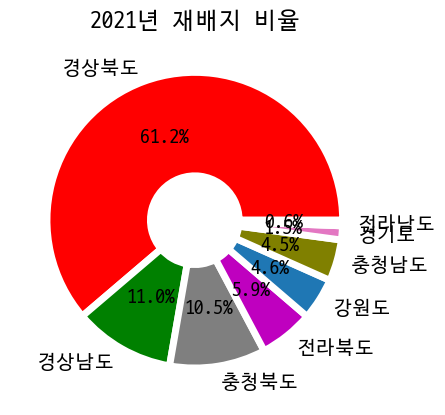

In [15]:
year = 2021
po = df[df['년']==year]
po = po[['년','지역','면적 (ha)']]
po1 = po['면적 (ha)'].nlargest(8)
labelpo = po.loc[po1.index,'지역']
colors=['r','g','tab:gray','m','tab:blue','olive','tab:pink']
ratio = po1
labels = labelpo
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title(f'{year}년 재배지 비율')
plt.pie(ratio, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=colors)
# plt.legend(loc='upper left')
plt.show()